In [4]:
#importing the neccessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import missingno as msno 
import plotly.graph_objects as go
from sklearn import preprocessing as pp 
from sklearn.linear_model import LogisticRegression as lr 
from sklearn.model_selection import train_test_split as tts 
from sklearn import metrics
from sklearn.metrics import classification_report as cr
import seaborn as sns 
sns.set(style="whitegrid")
sns.set(style="whitegrid", color_codes=True, font_scale=1.5, rc={'figure.figsize':(12,8.27)})


print("successful")

successful


In [5]:
#loading the dataset
path = "C:/Users/chiso/OneDrive/Documents/All datasets/train.csv"
dataset = pd.read_csv(path, index_col= False, header = 0)
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
#To see the first 10 rows
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
dataset.shape

(891, 12)

In [8]:
#Examining my data distribution
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#checking for missing dataset
missindata = dataset.isnull().sum().to_frame().rename(columns={0:'Empty Cells'} )
missindata

,Empty Cells
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

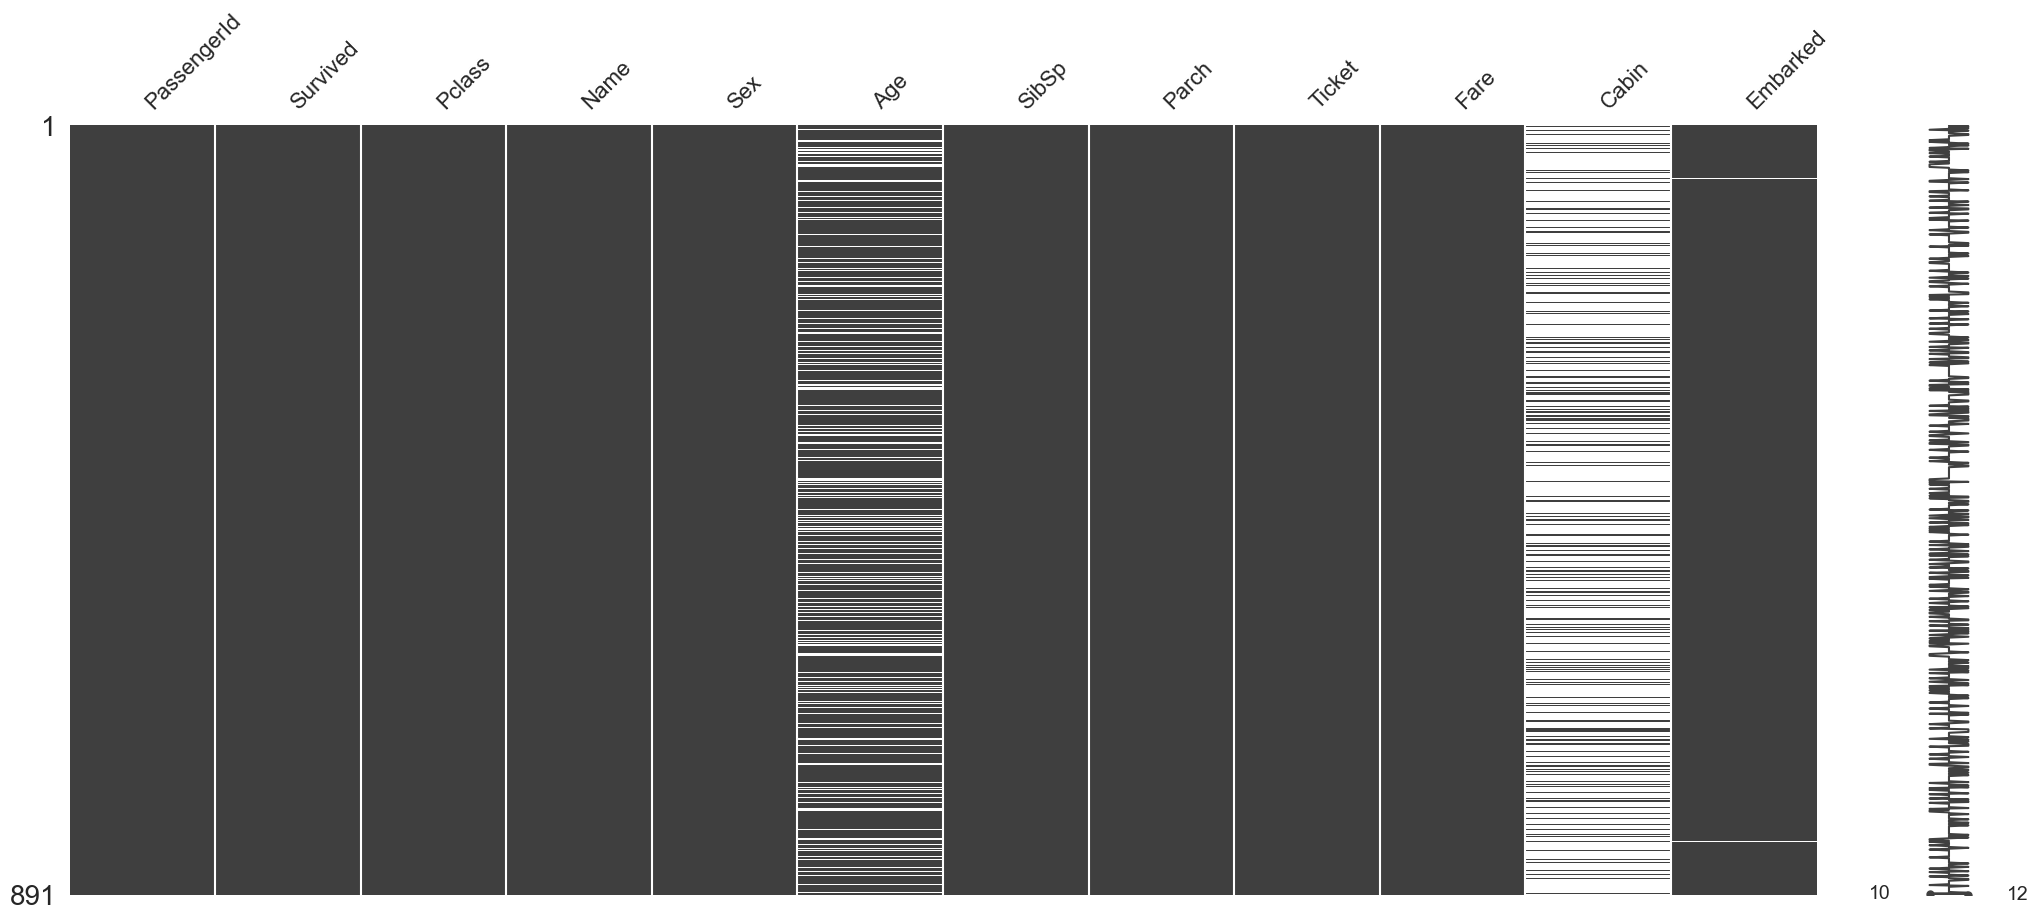

In [10]:
#Plotting a graph to examine my missing data
msno.matrix(dataset)

In [11]:
#Filtering the null rows to see clearly the relationship between the Age of individuals and the kind of ticket they bought
unknown_age = dataset["Age"].isnull()
unknown_embarked = dataset["Embarked"].isnull()
unknown_cabin = dataset["Cabin"].isnull()
unknown_age_and_cabin = dataset[unknown_age & unknown_cabin]
print(unknown_age_and_cabin.shape)
unknown_age_and_cabin

(158, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


We clearly see that majority of individuals with lower class ticket do not have their age and data properly recorded hence, there is bias in the gathering of the data

In [12]:
#Data cleaning
#Droppig the two empty rows for the embarked column as this is a small subset of our data
first_cleaning = dataset.dropna(subset = ["Embarked"])
first_cleaning.shape
first_cleaning = first_cleaning.reindex()

#Filling in the empty rows in the Age column with the mean since above 80% of the data is 
mean_age = first_cleaning["Age"].mean()
first_cleaning["Age"].fillna(mean_age, inplace=True)

#Filling in the empty rows in the cabin column with unknown
first_cleaning["Cabin"].fillna("Unknown", inplace= True)

#re-Examining for empty rows
new_dataset = first_cleaning.isnull().sum().to_frame().rename(columns= {0 : "empty_row"})
new_dataset

,empty_row
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [13]:
first_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [14]:
first_cleaning.drop(["PassengerId", "Name", "Ticket"], axis = 1, inplace = True)
first_cleaning

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,7.2500,Unknown,S
1,1,1,female,38.000000,1,0,71.2833,C85,C
2,1,3,female,26.000000,0,0,7.9250,Unknown,S
3,1,1,female,35.000000,1,0,53.1000,C123,S
4,0,3,male,35.000000,0,0,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,Unknown,S
887,1,1,female,19.000000,0,0,30.0000,B42,S
888,0,3,female,29.642093,1,2,23.4500,Unknown,S
889,1,1,male,26.000000,0,0,30.0000,C148,C


In [15]:
first_cleaning["Survived"].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

C:\Users\chiso\AppData\Local\Temp\ipykernel_9596\2933002788.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Survived", legend = True, stat = "percent", data = first_cleaning, palette = "bright").set(title = "Survival Rate")


[Text(0.5, 1.0, 'Survival Rate')]

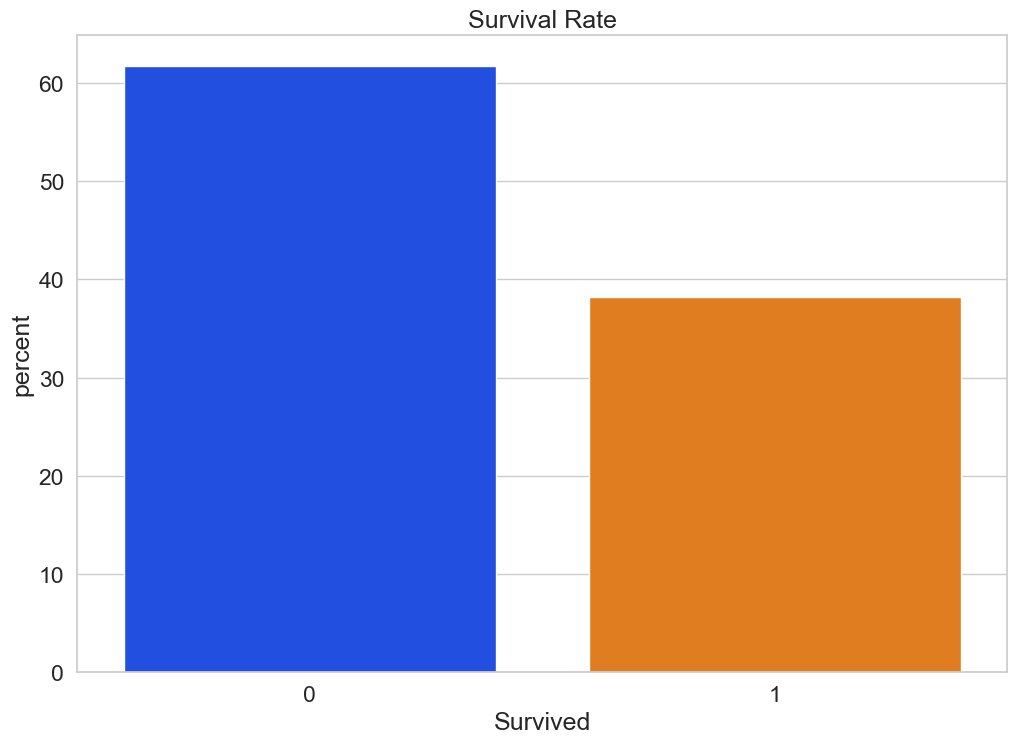

In [16]:
sns.countplot(x = "Survived", legend = True, stat = "percent", data = first_cleaning, palette = "bright").set(title = "Survival Rate")

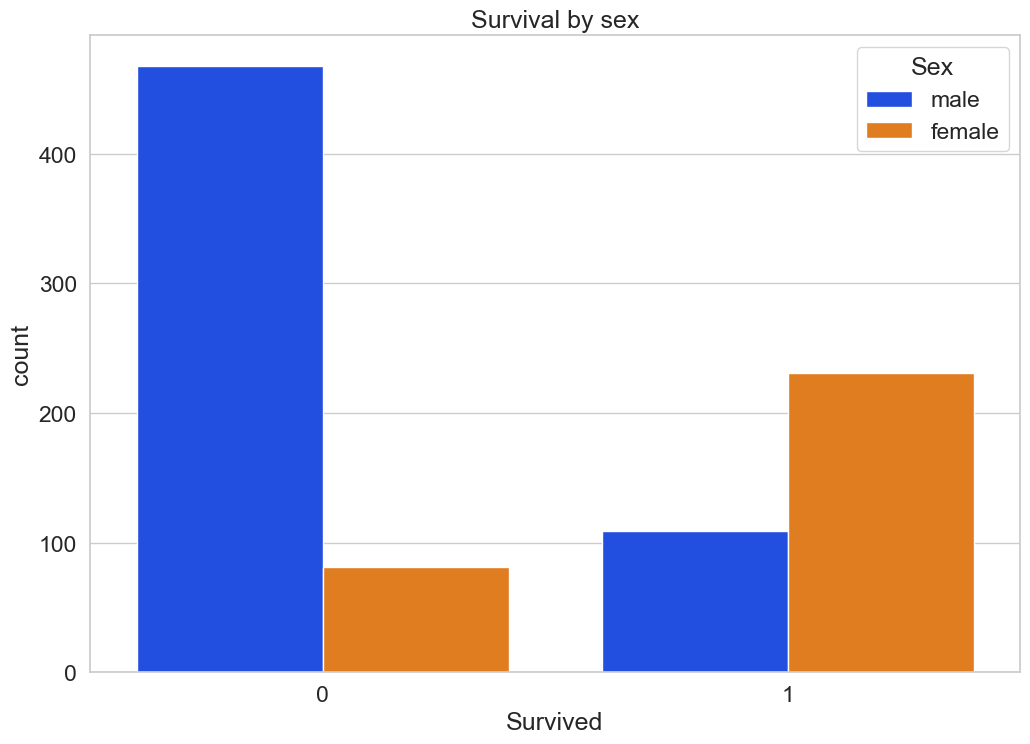

<Figure size 1200x827 with 0 Axes>

In [17]:
sns.countplot(x= "Survived", hue = "Sex", data = first_cleaning, saturation = 0.75, palette = "bright").set(title = "Survival by sex")
plt.show()
plt.savefig("countplot.png")

C:\Users\chiso\AppData\Local\Temp\ipykernel_9596\458273152.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Survived", y = "Age", data = first_cleaning, palette = "bright").set(title = "Survival by Age")


[Text(0.5, 1.0, 'Survival by Age')]

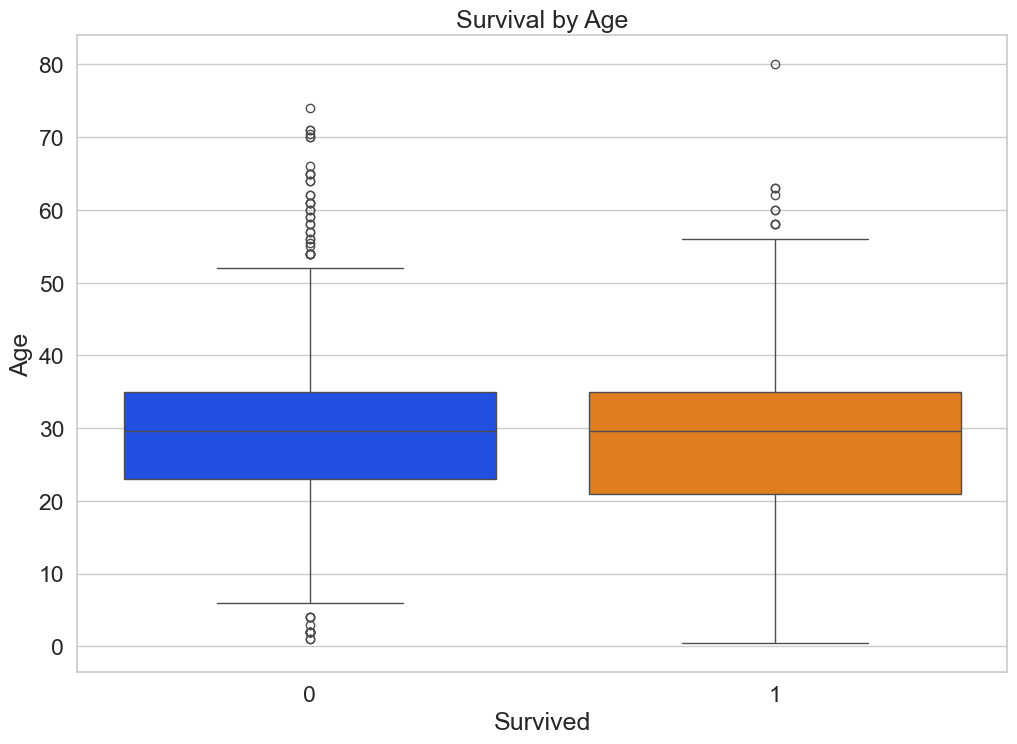

In [18]:
sns.boxplot(x = "Survived", y = "Age", data = first_cleaning, palette = "bright").set(title = "Survival by Age")



[Text(0.5, 1.0, 'Survival by Ticket class')]

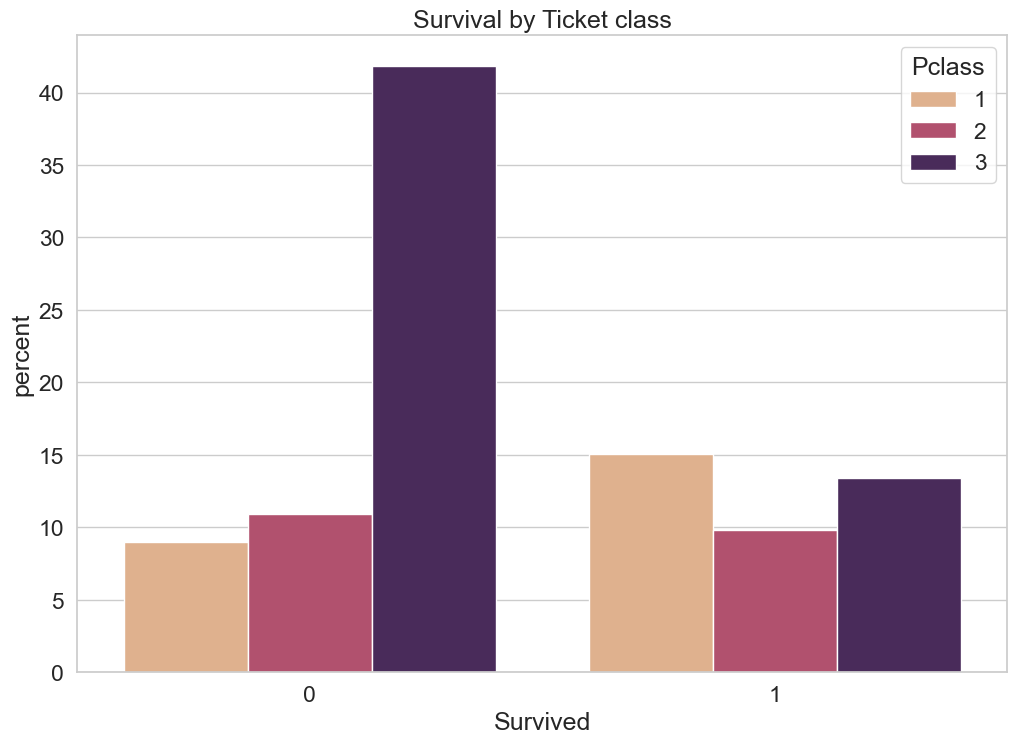

In [19]:
sns.countplot(x = "Survived", hue = "Pclass", stat = "percent", data = first_cleaning, palette = "flare").set(title = "Survival by Ticket class")


C:\Users\chiso\AppData\Local\Temp\ipykernel_9596\2709672637.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= "Survived", y = "Fare", data = first_cleaning,  palette = "bright").set(title = "Survival by Fare")


[Text(0.5, 1.0, 'Survival by Fare')]

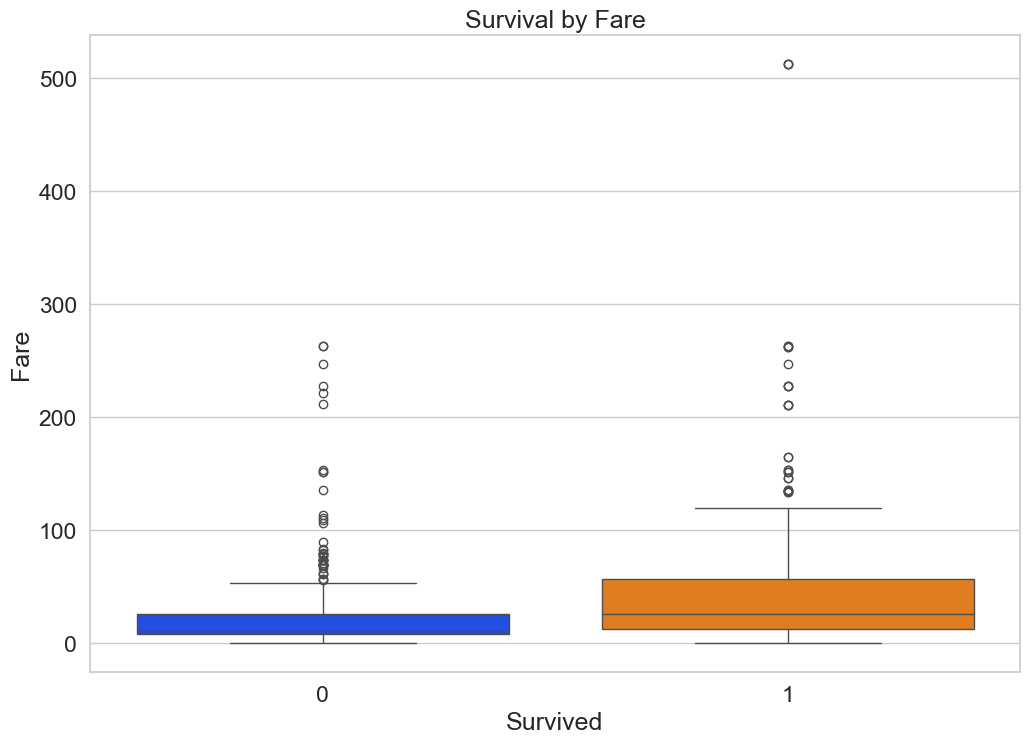

In [20]:
sns.boxplot(x= "Survived", y = "Fare", data = first_cleaning,  palette = "bright").set(title = "Survival by Fare")

[Text(0.5, 1.0, 'Survival by port')]

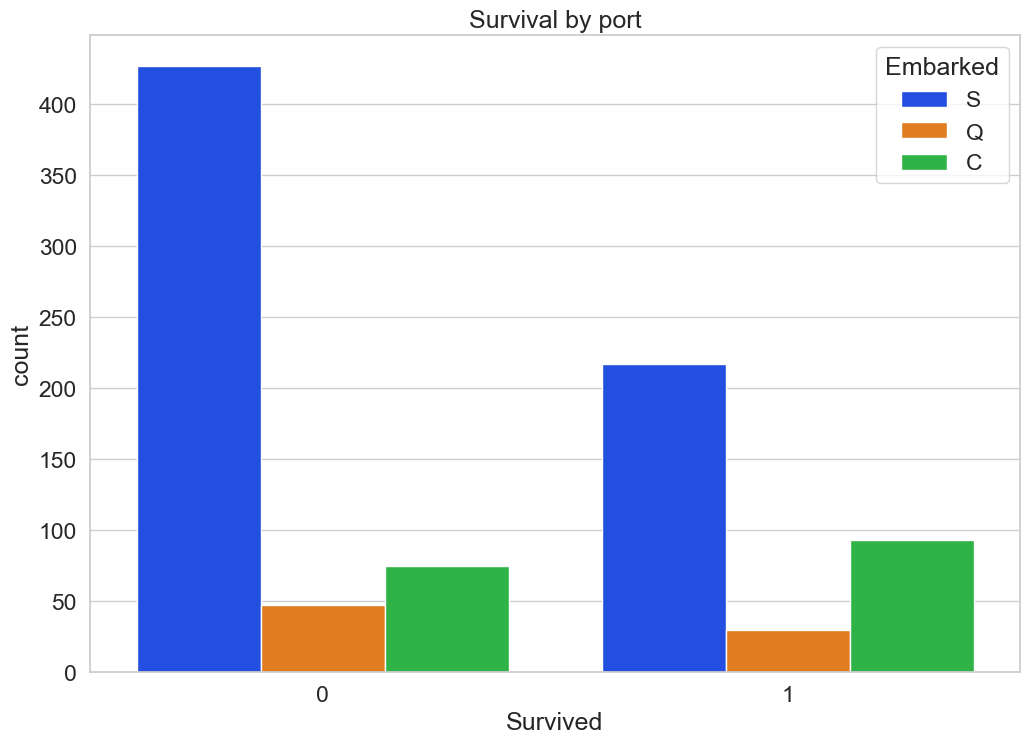

In [21]:
sns.countplot(x= "Survived", hue = "Embarked", data = first_cleaning,  palette = "bright").set(title = "Survival by port")

In [22]:
first_cleaning.Sex.replace({'male':0, 'female':1}, inplace= True)
first_cleaning.Embarked.replace({'S':0, 'Q':1, "C": 2}, inplace = True)

feature_cols = list(first_cleaning.columns.drop(["Cabin","Survived"]))
x = first_cleaning[feature_cols]
y = first_cleaning.Survived
x


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,2
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.642093,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,2


In [23]:
X_train, X_test, y_train, y_test = tts(x, y, test_size=0.3, random_state=0)
lgregfun = lr(random_state=0)
train = lgregfun.fit(X_train, y_train)
y_pred = lgregfun.predict(X_test)


cnf_matrix = metrics.confusion_matrix(y_pred, y_test)
cnf_matrix

array([[131,  35],
       [ 26,  75]], dtype=int64)

In [24]:
target_name = ["survived", "not survived"]
print(cr(y_test, y_pred, target_names=target_name))


              precision    recall  f1-score   support

    survived       0.79      0.83      0.81       157
not survived       0.74      0.68      0.71       110

    accuracy                           0.77       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.77      0.77      0.77       267



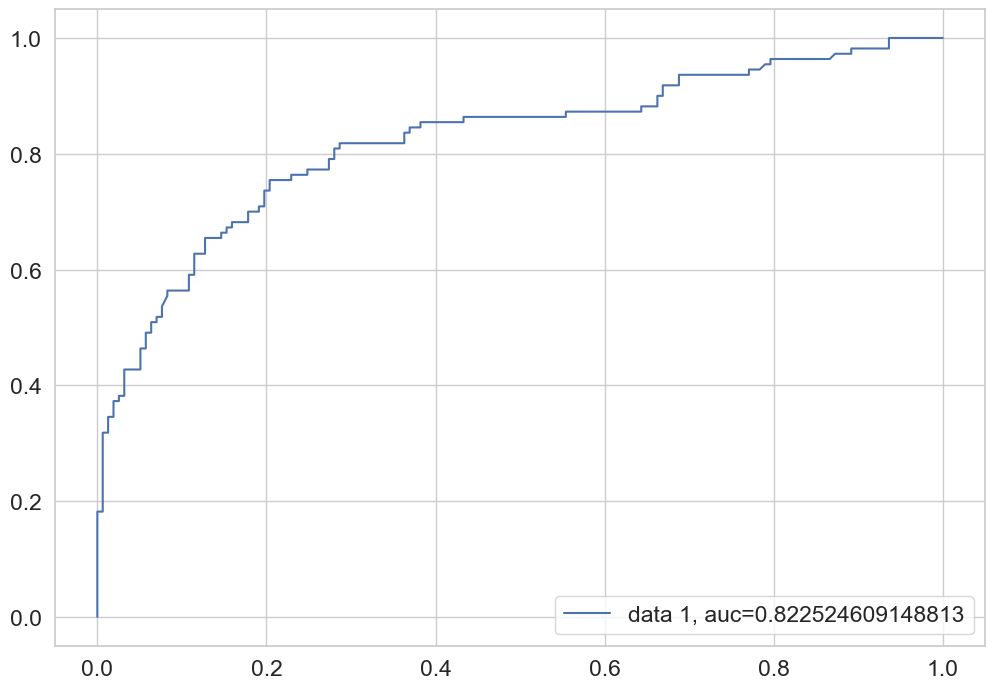

In [25]:
y_pred_proba = lgregfun.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [28]:
test_path = "c:/Users/chiso/OneDrive/Documents/All datasets/test.csv"
test_df = pd.read_csv(test_path)
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})